# **Система для сбора событий и логов**

ПРЗ 2. Анализ логов

ББМО-02-23 Карпейкин В.А.

1. Вариант - 12. Proxifier

In [1]:
import math
print (11%16+1)

12


# **1. Клонирование репозитория с логами**

In [2]:
import os.path

if not os.path.isdir("./loghub/"):
    !git clone https://github.com/logpai/loghub

Cloning into 'loghub'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 575 (delta 145), reused 135 (delta 132), pack-reused 404 (from 1)
Receiving objects: 100% (575/575), 7.27 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (267/267), done.


# **2. Парсинг лога и сохранение в СУБД:**

In [3]:
# Выведем первые несколько строк файла для анализа
log_file_path = './loghub/Proxifier/Proxifier_2k.log'

with open(log_file_path, 'r') as file:
    for _ in range(10):  # Выводим первые 10 строк
        print(file.readline())

[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[10.30 16:49:06] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.edu.hk:5070 close, 0 bytes sent, 0 bytes received, lifetime 00:01

[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.edu.hk:5070 close, 403 bytes sent, 426 bytes received, lifetime <1 sec

[10.30 16:49:07] chrome.exe - proxy.cse.cuhk.edu.hk:5070 open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS

[

In [5]:
import re

def parse_Proxifier_log_line(line):
    # Регулярное выражение для парсинга строки лога
    log_pattern = r'\[(.*?)\]\s+(.*?)\s+-\s+(.*?)\s+(.*)'
    match = re.match(log_pattern, line)
    if match:
        timestamp, process_name, destination, message = match.groups()
        return {
            'timestamp': timestamp,
            'process_name': process_name,
            'destination': destination,
            'message': message.strip()
        }
    return None

# Чтение и парсинг логов
log_file_path = './loghub/Proxifier/Proxifier_2k.log'

parsed_logs = []
with open(log_file_path, 'r') as file:
    for line in file:
        parsed_line = parse_Proxifier_log_line(line)
        if parsed_line:
            parsed_logs.append(parsed_line)

# Выводим несколько распарсенных логов для проверки
for log in parsed_logs[:5]:
    print(log)


{'timestamp': '10.30 16:49:06', 'process_name': 'chrome.exe', 'destination': 'proxy.cse.cuhk.edu.hk:5070', 'message': 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS'}
{'timestamp': '10.30 16:49:06', 'process_name': 'chrome.exe', 'destination': 'proxy.cse.cuhk.edu.hk:5070', 'message': 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS'}
{'timestamp': '10.30 16:49:06', 'process_name': 'chrome.exe', 'destination': 'proxy.cse.cuhk.edu.hk:5070', 'message': 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS'}
{'timestamp': '10.30 16:49:07', 'process_name': 'chrome.exe', 'destination': 'proxy.cse.cuhk.edu.hk:5070', 'message': 'close, 0 bytes sent, 0 bytes received, lifetime 00:01'}
{'timestamp': '10.30 16:49:07', 'process_name': 'chrome.exe', 'destination': 'proxy.cse.cuhk.edu.hk:5070', 'message': 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS'}


In [6]:
import sqlite3

# Подключаемся к базе данных (или создаем новую)
conn = sqlite3.connect('logs.db')
cursor = conn.cursor()

# Создаем таблицу для логов
cursor.execute('''
    CREATE TABLE IF NOT EXISTS logs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        process_name TEXT,
        destination TEXT,
        message TEXT
    )
''')
# Сохраняем изменения
conn.commit()

In [7]:
# Функция для вставки логов в таблицу
def insert_log(log):
    cursor.execute('''
        INSERT INTO logs (timestamp, process_name, destination, message)
        VALUES (?, ?, ?, ?)
    ''', (log['timestamp'], log['process_name'], log['destination'], log['message']))

# Вставляем распарсенные логи в базу данных
for log in parsed_logs:
    insert_log(log)

# Сохраняем изменения
conn.commit()

In [8]:
# Проверяем, что данные добавлены
cursor.execute('SELECT * FROM logs LIMIT 5')
rows = cursor.fetchall()
for row in rows:
    print(row)

# Закрываем соединение
conn.close()

(1, '10.30 16:49:06', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')
(2, '10.30 16:49:06', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')
(3, '10.30 16:49:06', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')
(4, '10.30 16:49:07', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'close, 0 bytes sent, 0 bytes received, lifetime 00:01')
(5, '10.30 16:49:07', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')


# **3. Нормализация логов и сохранение в СУБД:**

In [9]:
import sqlite3

# Функция для нормализации логов
def normalize_log(log):
    return {
        'timestamp': log['timestamp'].strip(),
        'process_name': log['process_name'].strip(),
        'destination': log['destination'].strip(),
        'message': log['message'].strip()
    }

# Подключаемся к базе данных
conn = sqlite3.connect('logs.db')
cursor = conn.cursor()

# Удаляем таблицу, если она уже существует
cursor.execute('DROP TABLE IF EXISTS normalized_logs')

# Создаем таблицу для нормализованных логов
cursor.execute('''
    CREATE TABLE normalized_logs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        process_name TEXT,
        destination TEXT,
        message TEXT
    )
''')

# Нормализуем и сохраняем записи в новую таблицу
for log in parsed_logs:
    normalized_log = normalize_log(log)
    cursor.execute('''
        INSERT INTO normalized_logs (timestamp, process_name, destination, message)
        VALUES (?, ?, ?, ?)
    ''', (
        normalized_log['timestamp'],
        normalized_log['process_name'],
        normalized_log['destination'],
        normalized_log['message']
    ))

# Сохраняем изменения
conn.commit()

# Проверяем, что данные добавлены в нормализованную таблицу
cursor.execute('SELECT * FROM normalized_logs LIMIT 5')
rows = cursor.fetchall()
for row in rows:
    print(row)

# Закрываем соединение
conn.close()


(1, '10.30 16:49:06', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')
(2, '10.30 16:49:06', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')
(3, '10.30 16:49:06', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')
(4, '10.30 16:49:07', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'close, 0 bytes sent, 0 bytes received, lifetime 00:01')
(5, '10.30 16:49:07', 'chrome.exe', 'proxy.cse.cuhk.edu.hk:5070', 'open through proxy proxy.cse.cuhk.edu.hk:5070 HTTPS')


# **4. Статистический анализ и визуализация:**

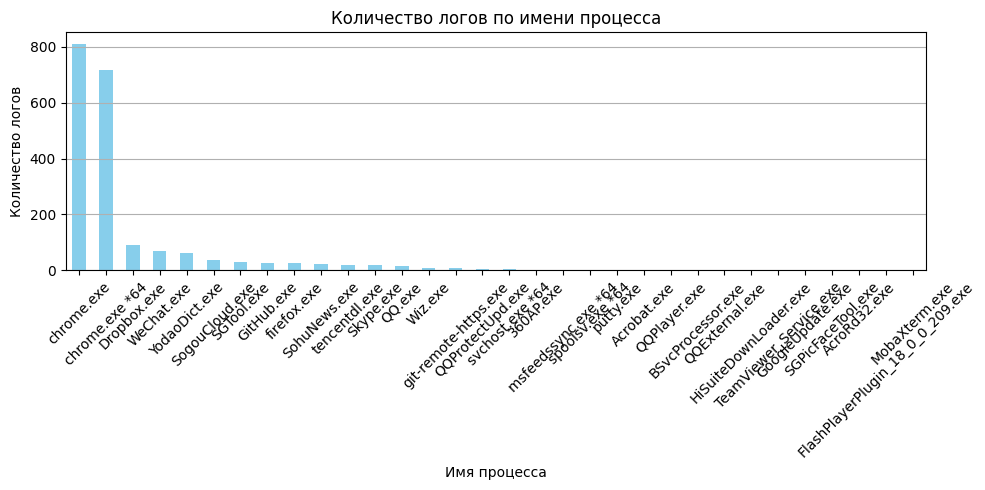

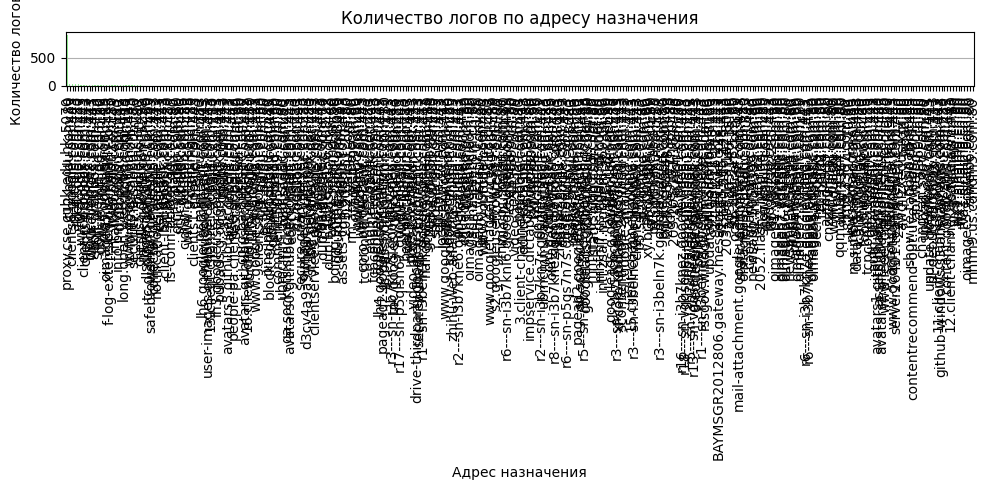

<ipython-input-10-468d7614b4ca>:51: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  logs_per_time = df.resample('1T').size()


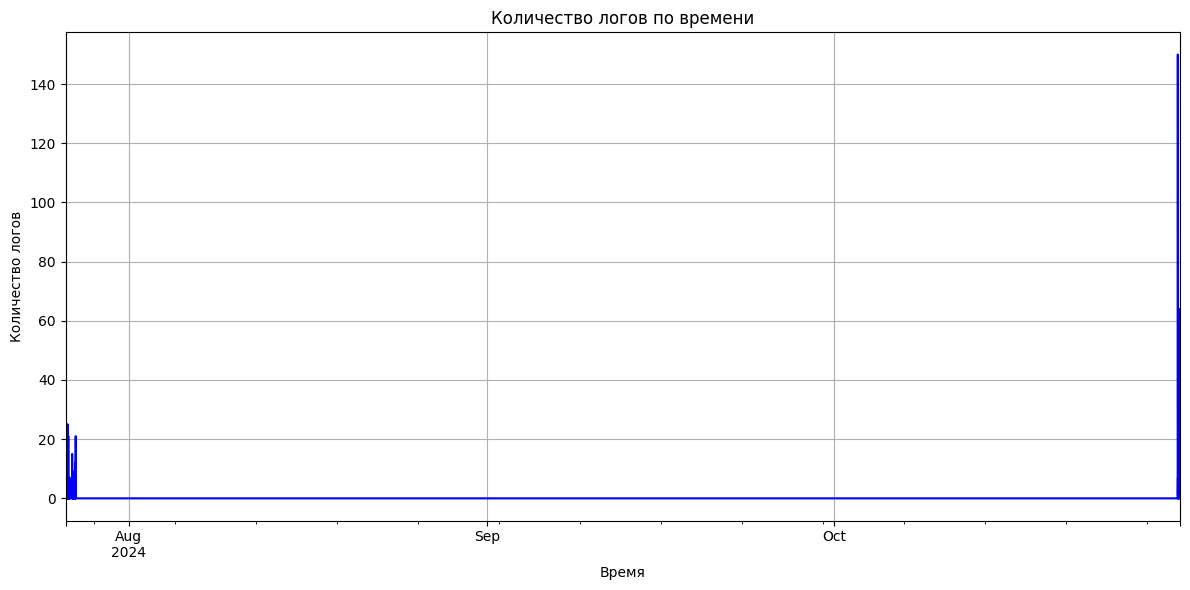

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Подключаемся к базе данных
conn = sqlite3.connect('logs.db')

# Читаем нормализованные логи в DataFrame
df = pd.read_sql_query('SELECT * FROM normalized_logs', conn)

# Статистический анализ
# Подсчет количества логов по имени процесса
process_counts = df['process_name'].value_counts()

# Подсчет количества логов по адресу назначения
destination_counts = df['destination'].value_counts()

# Визуализация количества логов по имени процесса
plt.figure(figsize=(10, 5))
process_counts.plot(kind='bar', color='skyblue')
plt.title('Количество логов по имени процесса')
plt.xlabel('Имя процесса')
plt.ylabel('Количество логов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Визуализация количества логов по адресу назначения
plt.figure(figsize=(10, 5))
destination_counts.plot(kind='bar', color='lightgreen')
plt.title('Количество логов по адресу назначения')
plt.xlabel('Адрес назначения')
plt.ylabel('Количество логов')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Преобразование столбца 'timestamp' в datetime
df['datetime'] = pd.to_datetime(df['timestamp'], format='%m.%d %H:%M:%S')

# Добавляем год к дате (предположим текущий год)
current_year = pd.Timestamp.now().year
df['datetime'] = df['datetime'].apply(lambda x: x.replace(year=current_year))

# Устанавливаем 'datetime' как индекс
df.set_index('datetime', inplace=True)

# Подсчет логов по времени с интервалом в 1 минуту
logs_per_time = df.resample('1T').size()

# Визуализация логов по времени
plt.figure(figsize=(12, 6))
logs_per_time.plot(color='blue')
plt.title('Количество логов по времени')
plt.xlabel('Время')
plt.ylabel('Количество логов')
plt.grid()
plt.tight_layout()
plt.show()

# Закрываем соединение
conn.close()
